<div class="alert alert-block alert-info">
<b> Keywords: plots in plotly.express </b>
    <br>
    * data -> TOP universities all over the world from 2011-2016
    <br>
    * AIM-> show how to create the most common plots using plotly.express library </div>

- Line Charts
- Scatter plot
- Bar Charts
- Bubble Charts
- Histogram
- Word Cloud
- Box Plots
-  Scatter Matrix Plots
- 3D Scatter Plot with Colorscaling

# Plotly library

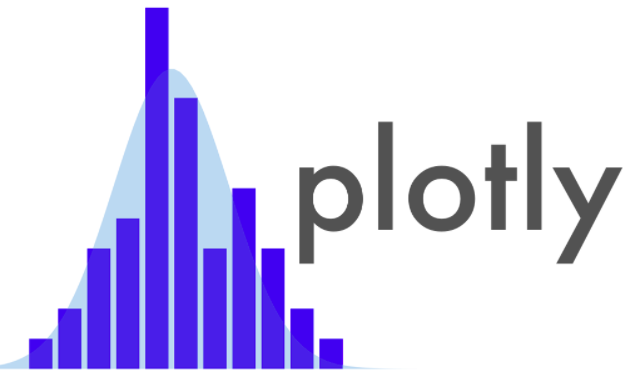

 Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.




In [5]:
# 1. Install the following library

#!pip install plotly

# 2. Restart the kernel

In [6]:
#!pip install wordcloud

In [7]:
import numpy as np 
import pandas as pd

import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<a id="1"></a> <br>
# Loading Data and Explanation of Features




<font color='blue'>



* timesData includes 14 features that are:

    <font color='black'>
    
    * world_rank             
    * university_name       
    * country               
    * teaching                
    * international            
    * research                 
    * citations                
    * income                   
    * total_score              
    * num_students             
    * student_staff_ratio      
    * international_students   
    * female_male_ratio        
    * year 

In [8]:
# Load data that we will use.
timesData = pd.read_csv('../../datasets/2.1.1.TimesData.csv')#, decimal = ',')

In [9]:
timesData.head(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011


In [10]:
timesData.world_rank.unique()

array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [11]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [12]:
timesData.head(4)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011


**`Exercise 1.`** Do an initial exploration of our datatset:
- Drop duplicates
- Select the variables of interest
- Replace missing values with the mean and the mode
- etc..
- data_cleaning 

    SOLVED for INSTRUCTOR.

In [13]:
timesData = timesData.drop_duplicates()

In [14]:
timesData.describe().T

,count,mean,std,min,25%,50%,75%,max
teaching,2603.0,37.801498,17.604218,9.9,24.700,33.9,46.40,99.7
research,2603.0,35.910257,21.254805,2.9,19.600,30.5,47.25,99.4
citations,2603.0,60.921629,23.073219,1.2,45.500,62.5,79.05,100.0
student_staff_ratio,2544.0,18.445283,11.458698,0.6,11.975,16.1,21.50,162.6
year,2603.0,2014.075682,1.685733,2011.0,2013.000,2014.0,2016.00,2016.0


In [15]:
# Execute this line (of course, modifying the path)
import sys
sys.path.insert(0, 'G:/Mi unidad/DS_CURRICULUM_FT/_functions_')

from Functions_EDA import *

In [16]:
percentage_nullValues(timesData)

,Percentage_NaN
female_male_ratio,9.0
international_students,2.6
num_students,2.3
student_staff_ratio,2.3
world_rank,0.0
university_name,0.0
country,0.0
teaching,0.0
international,0.0
research,0.0


In [17]:
timesData = fill_na(timesData)

Number of missing values on your dataset are

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64


## How to save a dataset into csv file?

In [18]:
timesData.to_csv('name_of_file.csv')

In [19]:
timesData.to_csv('../../datasets/sophie.csv')

# Line Charts

Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

    That is what we need: variable 1 (x axis), variable 2 (y axis)

In [20]:
# Always let's first prepare our data
df = timesData.iloc[:100,:]
df.head(3)
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

`Plotly Express`: a terse, consistent, high-level API for creating figures.

https://plotly.com/python/plotly-express/

In [21]:
# Step 1: Create the traces of the plots
fig = px.line(df, x="world_rank", y=["citations", "teaching"])
fig.show()

In [22]:
# Step 1: Create the traces of the plots
fig = px.line(df, x="world_rank", y=["citations","teaching"],
              hover_name = "university_name") # cha

# Step 2: Update the layout of the plot

fig.update_layout(title_text='Citation and Teaching vs World Rank of Top 100 Universities')

# hide and lock down axes
fig.update_yaxes(visible=False, fixedrange=True)

fig.show()

In [23]:
# Styling: include customized colors, different than the default ones
fig = px.line(df, x="world_rank", y=["citations","teaching"],
              hover_name="university_name", 
              color_discrete_sequence = ['DarkGoldenRod', 'lightGreen']) # cha

# Step 2: Update the layout of the plot

fig.update_layout(title_text='Citation and Teaching vs World Rank of Top 100 Universities')

# hide and lock down axes
fig.update_yaxes(visible=False, fixedrange=True)

fig.show()

**`Exercise 2`**. Repeat the same plot but in that case considering the 100 bottom universities.
- Customize the plot using the two colors that you want
-  Can you extract some conclusions by comparing them? 

# Scatter plot

    
    Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [24]:
timesData.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [25]:
# Always prepare the data
df_years = timesData[timesData.year >= 2014]

In [26]:
df_years.year.unique()

array([2014, 2015, 2016], dtype=int64)

     Let's create the plot

In [27]:
# Step 1: Create the traces of the plots
fig = px.scatter(df_years, x="world_rank", y="citations", color= "year"
                 , color_continuous_scale=['black', 'green', 'blue','red'])
fig.show()

In [28]:
# Step 1: Create the traces of the plots
fig = px.scatter(df_years, x="world_rank", y="citations", color='year',
                color_continuous_scale= ['gold', 'coral', 'green'])
   
    
 # Step 2: Update the layout of the plot

fig.update_layout(title_text='Citations vs world rank of top 100 universities with 2014, 2015 and 2016 years')

# axes styling
fig.update_xaxes(title= 'World Rank',ticklen= 150,zeroline= False)
fig.update_yaxes(title= 'Citation',ticklen= 5,zeroline= False)   
    
#fig.update_layout(coloraxis_showscale=False)
fig.show()

**`Exercise 3.`** Repeat the scatter plot but in that case considering the remaining years (2010 til 2013).
a) Customize the plot using the two colors that you want
b) Can you extract some conclusions by comparing them? 

In [29]:
# Always prepare the data
df_years = timesData[timesData.year < 2014]

In [30]:
# Step 1: Create the traces of the plots
fig = px.scatter(df_years, x="world_rank", y="citations", color='year',
                color_continuous_scale= ['gold', 'coral', 'green'])
   
    
 # Step 2: Update the layout of the plot

fig.update_layout(title_text='Citations vs world rank of top 100 universities with 2011, 2012 and 2013 years')

# axes styling
fig.update_xaxes(title= 'World Rank',ticklen= 150,zeroline= False)
fig.update_yaxes(title= 'Citation',ticklen= 5,zeroline= False)   
    
#fig.update_layout(coloraxis_showscale=False)
fig.show()


# Bar Charts


    First Bar Charts Example: citations and teaching of top 5 universities in 2014 (style1)

In [31]:
# Always prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:5,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014


In [32]:
# let's define a color list for each university
colors_2014 = ['DarkCyan', 'Chartreuse', 'OrangeRed']

    Grouped Bar

In [33]:
# Step 1: Create the traces of the plots
fig = px.bar(df2014, x = 'university_name', 
                 y = ['citations','teaching', 'research'], 
                 color_discrete_sequence = colors_2014)

# Step 2: Update the layout of the plot

# hide and lock down axes
#fig.update_yaxes(visible=False, fixedrange=True)
fig.update_layout(barmode='group')

fig.show()

    Stacked Bar

In [34]:
# Step 1: Create the traces of the plots
fig = px.bar(df2014, x = 'university_name', 
                 y = ['citations','teaching', 'research'], 
                 color_discrete_sequence=colors_2014)

 # Step 2: Update the layout of the plot
fig.show()

    Second Bar Charts Example: citations and teaching of top 5 universities in 2014 (style2)

In [35]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:5,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014


In [36]:
colors_2014

['DarkCyan', 'Chartreuse', 'OrangeRed']

In [37]:
# Step 1: Create the traces of the plots
fig = px.bar(df2014, x = 'university_name', 
                 y = 'research', 
                 color_discrete_sequence=colors_2014)


fig.show()

# Pie Charts


    Pie Charts Example: Students rate of top 5 universities in 2014
    

    
* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

In [38]:
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014


In [39]:
df2014['num_students'] = df2014['num_students'].str.replace(',', '')#.astype(int)
df2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1002 to 1006
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              5 non-null      object 
 1   university_name         5 non-null      object 
 2   country                 5 non-null      object 
 3   teaching                5 non-null      float64
 4   international           5 non-null      object 
 5   research                5 non-null      float64
 6   citations               5 non-null      float64
 7   income                  5 non-null      object 
 8   total_score             5 non-null      object 
 9   num_students            5 non-null      object 
 10  student_staff_ratio     5 non-null      float64
 11  international_students  5 non-null      object 
 12  female_male_ratio       5 non-null      object 
 13  year                    5 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [40]:
df2014['num_students']  = df2014['num_students'].astype(int)

In [41]:
df2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1002 to 1006
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              5 non-null      object 
 1   university_name         5 non-null      object 
 2   country                 5 non-null      object 
 3   teaching                5 non-null      float64
 4   international           5 non-null      object 
 5   research                5 non-null      float64
 6   citations               5 non-null      float64
 7   income                  5 non-null      object 
 8   total_score             5 non-null      object 
 9   num_students            5 non-null      int32  
 10  student_staff_ratio     5 non-null      float64
 11  international_students  5 non-null      object 
 12  female_male_ratio       5 non-null      object 
 13  year                    5 non-null      int64  
dtypes: float64(4), int32(1), int64(1), objec

In [42]:
#df2014['num_students'].apply(lambda x: float(x.replace(',', '')))

In [43]:
#df2014['num_students'] = df2014['num_students'].apply(lambda x: float(x.replace(',', '')))

In [44]:
colors = ['Gold', 'DarkCyan', 'LightGreen', 'OrangeRed', 'Chartreuse']

In [45]:
fig = px.pie(df2014, values='num_students')
fig.show()

In [46]:
fig = px.pie(df2014, values='num_students',
             names='university_name', 
             title='Universities Number of Students rates',
             color_discrete_sequence = colors)
# Styling 
fig.update(layout_title_text='[2014] - Universities Number of Students rates')

fig.update_traces(textinfo='percent', textposition='inside', textfont_size=14,
                  marker=dict(colors=colors,
                              line=dict(color='#000000', width=2)))
                 
fig.show()
#fig.write_html("idoia.html")

In [47]:
# Option 2: Percent + labels

fig2 = px.pie(df2014, values='num_students', names='university_name', 
             title='Universities Number of Students rates',
            color_discrete_sequence = colors)
# Styling 
fig2.update(layout_title_text='Universities Number of Students rates')
fig2.update_traces(textinfo='percent+label', textposition='inside',
                   textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig2.show()

# Bubble Charts

    Bubble Charts Example: University world rank (first 20) vs teaching score with income (size) and international score (color) in 2014


    
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

In [48]:
# data preparation
df2014 = timesData[timesData.year == 2014].iloc[:20,:]

df2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1002 to 1021
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              20 non-null     object 
 1   university_name         20 non-null     object 
 2   country                 20 non-null     object 
 3   teaching                20 non-null     float64
 4   international           20 non-null     object 
 5   research                20 non-null     float64
 6   citations               20 non-null     float64
 7   income                  20 non-null     object 
 8   total_score             20 non-null     object 
 9   num_students            20 non-null     object 
 10  student_staff_ratio     20 non-null     float64
 11  international_students  20 non-null     object 
 12  female_male_ratio       20 non-null     object 
 13  year                    20 non-null     int64  
dtypes: float64(4), int64(1), object(9)
memo

    Let's explore income variable which is an object. Why?

In [49]:
df2014.income.value_counts()

-        3
100.0    2
72.3     1
35.8     1
53.5     1
45.2     1
78.8     1
38.7     1
91.2     1
40.6     1
59.5     1
52.8     1
80.5     1
94.3     1
61.3     1
90.3     1
45.8     1
Name: income, dtype: int64

In [50]:
df2014['income'] = df2014['income'].str.replace('-', '0')


In [51]:
df2014['income'] = df2014['income'].astype(float)

In [52]:
df2014['income']

1002     91.2
1003     40.6
1004     90.3
1005     61.3
1006     94.3
1007     80.5
1008     52.8
1009     59.5
1010      0.0
1011     72.3
1012     38.7
1013      0.0
1014      0.0
1015     78.8
1016    100.0
1017     45.2
1018    100.0
1019     53.5
1020     35.8
1021     45.8
Name: income, dtype: float64

In [53]:
#df2014['income'] = df2014['income'].apply(lambda x: float(x.replace('-', '0')))

     and what about international variable?

In [54]:
df2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1002 to 1021
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              20 non-null     object 
 1   university_name         20 non-null     object 
 2   country                 20 non-null     object 
 3   teaching                20 non-null     float64
 4   international           20 non-null     object 
 5   research                20 non-null     float64
 6   citations               20 non-null     float64
 7   income                  20 non-null     float64
 8   total_score             20 non-null     object 
 9   num_students            20 non-null     object 
 10  student_staff_ratio     20 non-null     float64
 11  international_students  20 non-null     object 
 12  female_male_ratio       20 non-null     object 
 13  year                    20 non-null     int64  
dtypes: float64(5), int64(1), object(8)
memo

In [55]:
df2014.international.unique()

array(['65.8', '66.2', '90.2', '68.0', '82.0', '59.6', '86.7', '57.3',
       '58.6', '91.8', '57.6', '46.4', '96.7', '59.3', '40.6', '50.0',
       '49.5', '55.6', '70.0'], dtype=object)

In [56]:
df2014.international = df2014.international.astype('float')

In [57]:
# Step 1: Create the traces of the plots

fig = px.scatter(df2014, y="teaching", x="world_rank",
                 color='country',
                 size='income',size_max=30)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='[2014] Bubble chart teaching with income of universities')

# axes styling
fig.update_yaxes(title= 'Teaching',ticklen= 5,zeroline= False)
fig.update_xaxes(title= 'World Rank universities',ticklen= 5,zeroline= False)   
    
fig.update_layout(coloraxis_showscale=False)
fig.show()
fig.write_html("file.html")

**`Exercise 4.`** Repeat the above analysis for 2016  (bar, pie and bubble plots).

- Customize the plot using the two colors that you want
- Did the top 5 universities change after 2 years?
- and what about the income?


# Histogram
    Lets look at histogram of students-staff ratio in 2014 and 2016 years. 

In [58]:
timesData[(timesData.year == 2014) | (timesData.year == 2016)]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,54 : 46,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [59]:
data_2014_2016 = timesData[(timesData.year == 2014) | (timesData.year == 2016)]


In [60]:
data_2014_2016.year.value_counts()

2016    800
2014    400
Name: year, dtype: int64

In [61]:
data_2014_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,54 : 46,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [62]:
# Step 1: Create the traces of the plots
fig = px.histogram(data_2014_2016, x="student_staff_ratio", 
                   color="year", 
                   color_discrete_sequence=colors_2014)

# Step 2: Update the layout of the plot

fig.update_layout(title_text='Students-staff ratio in 2014 and 2016')

# axes styling
fig.update_xaxes(title= 'Students-staff ratio',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Count',ticklen= 5,zeroline= False)   
    
fig.show()


# Word Cloud

Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

In [63]:
timesData.head(4)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,54 : 46,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011


In [64]:
timesData.year == 2011

0        True
1        True
2        True
3        True
4        True
        ...  
2598    False
2599    False
2600    False
2601    False
2602    False
Name: year, Length: 2603, dtype: bool

In [65]:
# data preparation
x2011 = timesData.country[timesData.year == 2011]
x2011
x2011.value_counts()

United States of America    72
United Kingdom              29
Germany                     14
Netherlands                 10
Canada                       9
Australia                    7
China                        6
Sweden                       6
Switzerland                  6
Japan                        5
South Korea                  4
France                       4
Hong Kong                    4
Taiwan                       4
Denmark                      3
Spain                        2
Belgium                      2
Republic of Ireland          2
Turkey                       2
Singapore                    2
Austria                      2
South Africa                 1
Finland                      1
Norway                       1
New Zealand                  1
Egypt                        1
Name: country, dtype: int64

In [66]:
x2011

0      United States of America
1      United States of America
2      United States of America
3      United States of America
4      United States of America
                 ...           
195    United States of America
196    United States of America
197                       China
198                      Canada
199                      Sweden
Name: country, Length: 200, dtype: object

In [67]:
" ".join(x2011)

'United States of America United States of America United States of America United States of America United States of America United Kingdom United Kingdom United States of America United Kingdom United States of America United States of America United States of America United States of America United States of America Switzerland United States of America Canada United States of America United States of America United States of America Hong Kong United Kingdom United States of America United States of America United States of America Japan United States of America South Korea United States of America Canada United States of America United States of America United States of America Singapore Canada Australia China United States of America France United Kingdom Hong Kong France Australia Sweden Germany United States of America United States of America Switzerland United States of America China United States of America United States of America United States of America United States of Ame

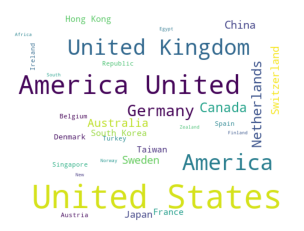

In [68]:
#np.random.seed(20)
#plt.subplots(figsize=(8,8))

wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)

wordcloud.generate(" ".join(x2011))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('idoia.png')

#plt.show()

     Do you think it makes sense? Let's correct the countries in order to get the right representation

In [69]:
data = timesData.copy()
data['country'] = data['country'].str.replace('United Kingdom', 'UK')

In [70]:
data['country'] = data['country'].str.replace('Unted Kingdom', 'UK')

In [71]:
data['country'] = data['country'].str.replace('United States of America', 'USA')

In [72]:
data['country'] = data['country'].str.replace('Unisted States of America', 'USA')

In [73]:
data.country.unique()

array(['USA', 'UK', 'Switzerland', 'Canada', 'Hong Kong', 'Japan',
       'South Korea', 'Singapore', 'Australia', 'China', 'France',
       'Sweden', 'Germany', 'Republic of Ireland', 'Finland', 'Taiwan',
       'South Africa', 'Turkey', 'Netherlands', 'Belgium', 'Denmark',
       'Norway', 'Spain', 'New Zealand', 'Egypt', 'Austria', 'Israel',
       'Brazil', 'Italy', 'Russian Federation', 'Greece', 'Iceland',
       'Czech Republic', 'India', 'Poland', 'Iran', 'Portugal',
       'Thailand', 'Chile', 'Estonia', 'Saudi Arabia', 'Mexico',
       'Colombia', 'Macau', 'Morocco', 'Luxembourg', 'Cyprus', 'Uganda',
       'Malaysia', 'Lebanon', 'Romania', 'Slovenia', 'Pakistan',
       'Hungary', 'United Arab Emirates', 'Belarus', 'Serbia', 'Slovakia',
       'Bangladesh', 'Ghana', 'Nigeria', 'Indonesia', 'Jordan', 'Latvia',
       'Kenya', 'Argentina', 'Qatar', 'Oman', 'Ukraine', 'Lithuania'],
      dtype=object)

In [74]:
data['country'] = data['country'].str.replace(' ', '_')

In [75]:
data['country'].unique()

array(['USA', 'UK', 'Switzerland', 'Canada', 'Hong_Kong', 'Japan',
       'South_Korea', 'Singapore', 'Australia', 'China', 'France',
       'Sweden', 'Germany', 'Republic_of_Ireland', 'Finland', 'Taiwan',
       'South_Africa', 'Turkey', 'Netherlands', 'Belgium', 'Denmark',
       'Norway', 'Spain', 'New_Zealand', 'Egypt', 'Austria', 'Israel',
       'Brazil', 'Italy', 'Russian_Federation', 'Greece', 'Iceland',
       'Czech_Republic', 'India', 'Poland', 'Iran', 'Portugal',
       'Thailand', 'Chile', 'Estonia', 'Saudi_Arabia', 'Mexico',
       'Colombia', 'Macau', 'Morocco', 'Luxembourg', 'Cyprus', 'Uganda',
       'Malaysia', 'Lebanon', 'Romania', 'Slovenia', 'Pakistan',
       'Hungary', 'United_Arab_Emirates', 'Belarus', 'Serbia', 'Slovakia',
       'Bangladesh', 'Ghana', 'Nigeria', 'Indonesia', 'Jordan', 'Latvia',
       'Kenya', 'Argentina', 'Qatar', 'Oman', 'Ukraine', 'Lithuania'],
      dtype=object)

In [76]:
x2011 = data.country[data.year == 2011]
x2011.value_counts()

USA                    72
UK                     29
Germany                14
Netherlands            10
Canada                  9
Australia               7
China                   6
Sweden                  6
Switzerland             6
Japan                   5
South_Korea             4
France                  4
Hong_Kong               4
Taiwan                  4
Denmark                 3
Spain                   2
Belgium                 2
Republic_of_Ireland     2
Turkey                  2
Singapore               2
Austria                 2
South_Africa            1
Finland                 1
Norway                  1
New_Zealand             1
Egypt                   1
Name: country, dtype: int64

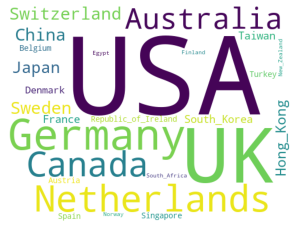

In [77]:
wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)
wordcloud.generate(" ".join(x2011))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

#plt.show()


# Box Plots
    
* Box Plots
    * Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
        * 25th percentile = quartile 1 (Q1) that is lower quartile
        * 75th percentile = quartile 3 (Q3) that is higher quartile
        * height of box = IQR = interquartile range = Q3-Q1
        * Whiskers = 1.5 * IQR from the Q1 and Q3
        * Outliers = being more than 1.5*IQR away from median commonly.

    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

In [78]:
# data preparation
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
1007,6,Princeton University,United States of America,89.9,59.6,97.6,99.7,80.5,92.7,"7,929",8.4,27%,45 : 55,2014
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,"18,812",11.8,34%,46 : 54,2014
1009,8,"University of California, Berkeley",United States of America,83.2,57.3,97.5,99.3,59.5,89.8,"36,186",16.4,15%,50 : 50,2014
1010,9,University of Chicago,United States of America,85.6,58.6,88.2,98.0,0.0,87.8,"14,221",6.9,21%,42 : 58,2014
1011,10,Imperial College London,United Kingdom,84.5,91.8,88.1,90.0,72.3,87.5,"15,060",11.7,51%,37 : 63,2014


In [79]:
fig = px.box(df2014, x ='total_score')
fig.show()

In [80]:
fig = px.box(df2014, y ='num_students', points="suspectedoutliers")
fig.show()

In [81]:
fig = px.box(df2014, x ='country',y="total_score", color = 'country',
             points="suspectedoutliers")
fig.show()

# Scatter Matrix Plots
Scatter Matrix = it helps us to see covariance and relation between more than 2 features
    
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

In [82]:
# import figure factory
import plotly.figure_factory as ff


data2014 = df2014.loc[:,["research","international", "total_score"]]
data2014

,research,international,total_score
1002,98.2,65.8,94.9
1003,98.5,66.2,93.9
1004,98.5,90.2,93.9
1005,96.8,68.0,93.8
1006,89.0,82.0,93.0
1007,97.6,59.6,92.7
1008,95.3,86.7,92.3
1009,97.5,57.3,89.8
1010,88.2,58.6,87.8
1011,88.1,91.8,87.5


In [83]:
# scatter matrix
fig = ff.create_scatterplotmatrix(data2014, diag='box',colormap='Portland',
                                  height=700, width=700)
fig.show()

# 3D Scatter Plot with Colorscaling

    3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
    

    
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

In [84]:
# Always prepare data frames
df2014 = timesData[timesData.year == 2014]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.900000,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.900000,25%,54 : 46,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.600000,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.800000,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.000000,33%,37 : 63,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,351-400,University of Tartu,Estonia,20.3,43.7,21.2,46.2,30.3,-,"10,269",13.000000,3%,66 : 34,2014
1398,351-400,University of Tasmania,Australia,18.7,69.9,16.7,49.1,36.9,-,"18,340",23.800000,21%,57 : 43,2014
1399,351-400,University of Valencia,Spain,16.6,39.3,12.4,59.0,31.7,-,"58,413",15.400000,9%,60 : 40,2014
1400,351-400,University of Vigo,Spain,19.7,25.9,10.7,62.9,38.2,-,"22,793",19.000000,3%,51 : 49,2014


In [85]:
timesData

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,54 : 46,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,54 : 46,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [86]:
fig = px.scatter_3d(df2014, x='world_rank', y='research', z='citations',color = 'country')
fig.show()
fig.write_html("file.html")